# Health Insurance Cost Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\datasets\insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Data Preprocessing

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null values to be handled

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df.sex = encoder.fit_transform(df.sex)
df.smoker = encoder.fit_transform(df.smoker)
df.region = encoder.fit_transform(df.region) 
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


Converted the labels in columns sex,smoker and region into numerical values.

Scaling the features 'bmi' and 'charges' 

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['bmi','charges']]=scaler.fit_transform(df[['bmi','charges']])

## Exploratory Data Analysis

[]

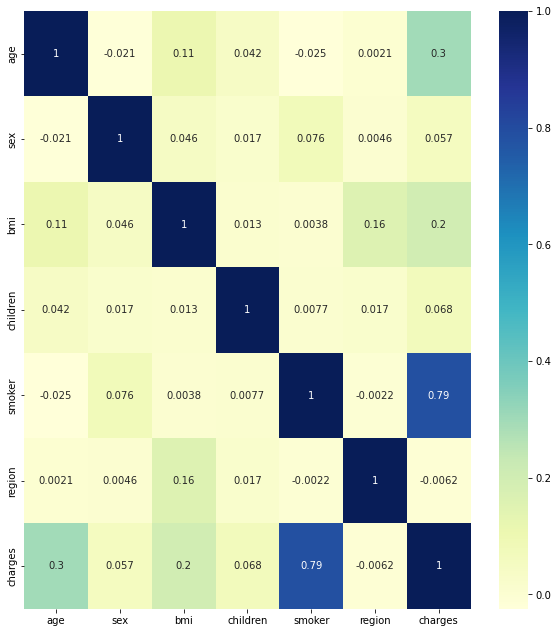

In [9]:
plt.figure(figsize=(10,11))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.plot()

Correlation of the variables.Smoker and charges are positively correlated.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


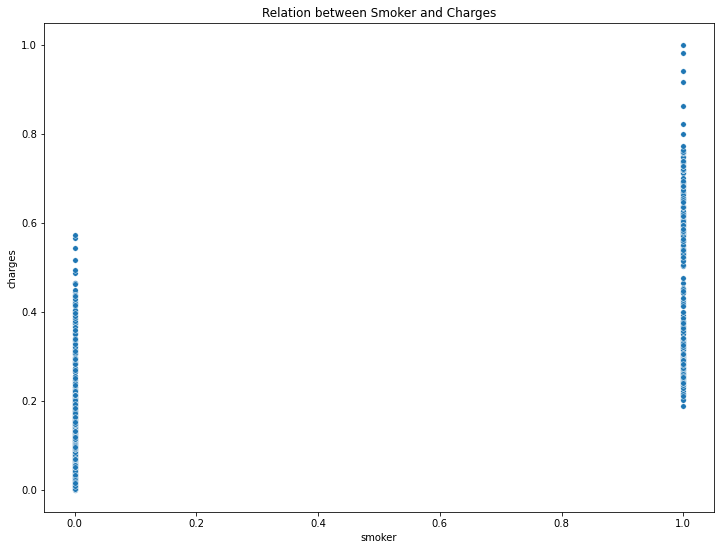

In [10]:
plt.figure(figsize=(12,9))
plt.title("Relation between Smoker and Charges")
sns.scatterplot(df["smoker"],df["charges"],s=30)
plt.show()

From the scatter plot, it is clear that there is an increase in the insurance charges in users who smoke compared with those who do not smoke.

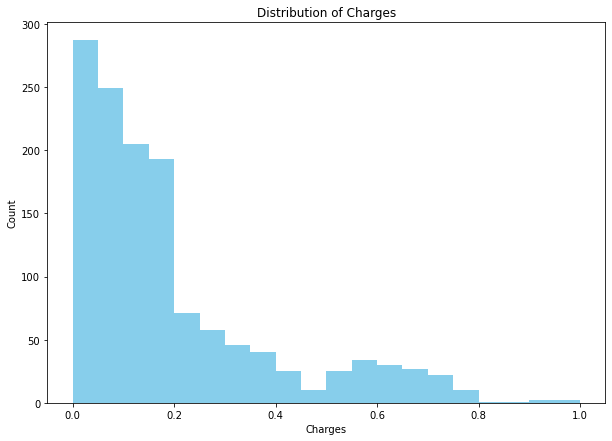

In [11]:
plt.figure(figsize = (10, 7))
x = df["charges"]
plt.hist(x, bins = 20, color ="skyblue")
plt.title("Distribution of Charges")
plt.xlabel("Charges")
plt.ylabel("Count")
plt.show()


### Splitting of data

In [12]:
x=df.drop(labels="charges",axis=1)
y=df['charges']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=101)


## Regression Models

### Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(x_train,y_train)

lr.predict(x_test)
pred = lr.predict(x_test)

##### Evaluation

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rmse_lr=np.sqrt(mean_squared_error(y_test, pred))
r2_lr=r2_score(y_test, pred)

print("rmse:",rmse_lr)
print("Regression Score:",r2_lr)

rmse: 0.09242864233326234
Regression Score: 0.7613126015198817


### Ridge

In [16]:
from sklearn.linear_model import Ridge

rr = Ridge()
rr.fit(x_train,y_train)

pred_r = rr.predict(x_test)


##### Evaluation

In [17]:
r2_rr = r2_score(y_test,pred_r)
rmse_rr=np.sqrt(mean_squared_error(y_test, pred_r))

print("rmse:",rmse_rr)
print("Regression Score:",r2_rr)

rmse: 0.09237239446792303
Regression Score: 0.7616030217010564


### Decision Tree

In [18]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(criterion='absolute_error',random_state=0)
dt.fit(x_train,y_train)

pred_d = dt.predict(x_test)


##### Evaluation

In [19]:
r2_dt = r2_score(y_test,pred_d)
rmse_dt=np.sqrt(mean_squared_error(y_test, pred_d))

print("rmse:",rmse_dt)
print("Regression Score:",r2_dt)

rmse: 0.10439064163882242
Regression Score: 0.6955335262618613


### Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)

pred_rf = rf.predict(x_test)


##### Evaluation

In [21]:
r2_rf = r2_score(y_test,pred_rf)
rmse_rf=np.sqrt(mean_squared_error(y_test, pred_rf))

print("rmse:",rmse_rf)
print("Regression Score:",r2_rf)

rmse: 0.07970381440816453
Regression Score: 0.8225097277899551


### XGBoost

In [22]:
from xgboost.sklearn import XGBRegressor

xgb_reg = XGBRegressor(learning_rate = 1.0, max_depth=6, min_child_weight=40,seed=0)
xgb_reg.fit(x_train,y_train)
pred_xg=xgb_reg.predict(x_test)

##### Evaluation

In [23]:
r2_xgb=r2_score(y_test,pred_xg)
rmse_xgb=np.sqrt(mean_squared_error(y_test, pred_xg))

print("rmse:",rmse_xgb)
print("Regression Score:",r2_xgb)

rmse: 0.08832767205467014
Regression Score: 0.7820233809125711


### KNN

In [24]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)

##### Evaluation

In [25]:
r2_knn=r2_score(y_test,pred_knn)
rmse_knn=np.sqrt(mean_squared_error(y_test, pred_knn))

print("rmse:",rmse_knn)
print("Regression Score:",r2_knn)

rmse: 0.15490324737210656
Regression Score: 0.3295947786530874


### Comparison of Models

#### Comparing Regression Scores

In [26]:
R2_Score = [r2_lr,r2_rr,r2_dt,r2_rf,r2_xgb,r2_knn]

Models = ['Linear Regression', ' Ridge Regression' , 'Decision Tree', 'Random Forest','xgboost','KNN']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


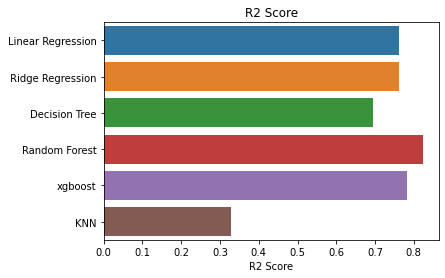

In [27]:
sns.barplot(R2_Score, Models)
plt.xlabel('R2 Score')
plt.title('R2 Score')
plt.show()

Here, Random Forest has the highest Regression Score.

#### Comparison of RMSE Values

In [28]:
rmse = [rmse_lr,rmse_rr,rmse_dt,rmse_rf,rmse_xgb,rmse_knn]

models = ['Linear Regression', ' Ridge Regression' , 'Decision Tree', 'Random Forest','XGBoost','KNN']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


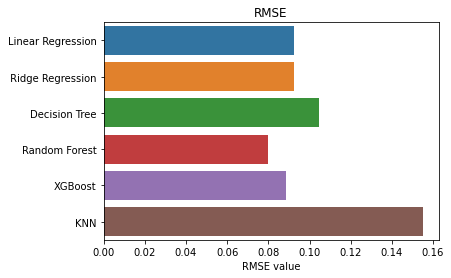

In [29]:
sns.barplot(rmse, models)
plt.xlabel('RMSE value')
plt.title('RMSE')
plt.show()

Here, Random Forest has the least Root Mean Squared Error Value.

##### From the comparison of Regression Scores and RMSE values, we could find the Random Forest as the best Model.

## Interpretability

#### Using the Rulefit Model to generate candidate rule that interprets the Random Forest Model.

##### Plotting the feature importances :

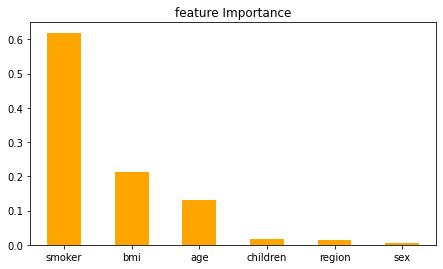

In [30]:
 
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
feat_importances = feat_importances.sort_values(ascending=False)


plt.subplot(224) 
feat_importances.plot(kind='bar', title='feature Importance', figsize=(16,9),color ="orange")

plt.xticks(rotation=0)

plt.show()

We can easily identify Smoker, bmi and age are by far the most significant features affecting the target (i.e., charges).

#### creating custom rules for more explainability and interpretability.

In [31]:
pip install rulefit 

In [32]:
from rulefit import RuleFit

rulefit = RuleFit(tree_generator=RandomForestRegressor(n_estimators = 100))            # Create and Train RuleFit Model
rulefit.fit(x_train.values, y_train, feature_names=x_train.columns)

RuleFit(tree_generator=RandomForestRegressor(max_leaf_nodes=4, n_estimators=568,
                                             random_state=567))

In [33]:
rulefit_preds = rulefit.predict(x_test.values)
rulefit_rmse = np.sqrt(((rulefit_preds - y_test) ** 2).mean())                  # Evaluation
print("rmse:",rulefit_rmse)
print("Regression score:",r2_score(y_test,rulefit_preds ))

rmse: 0.07178687870257515
Regression score: 0.8560185693461693


In [34]:
rules = rulefit.get_rules()
rules = rules.sort_values('support', ascending=False)
rules.iloc[:15]

,rule,type,coef,support,importance
0,age,linear,0.003034,1.000000,0.042438
2,bmi,linear,0.030951,1.000000,0.004878
3,children,linear,0.001343,1.000000,0.001550
4,smoker,linear,0.178328,1.000000,0.073493
5,region,linear,-0.005292,1.000000,0.005809
1,sex,linear,-0.002567,1.000000,0.001283
150,smoker <= 0.5,rule,-0.002291,0.788333,0.000936
100,smoker <= 0.5 & age <= 49.5,rule,-0.000331,0.541096,0.000165
21,smoker <= 0.5 & age <= 46.5,rule,-0.000000,0.524834,0.000000
153,smoker <= 0.5 & age <= 47.5,rule,-0.000000,0.523569,0.000000


#### To have a better output :

In [35]:
pd.set_option('display.max_colwidth', 400)        # Adjust row width to read the entire rule
pd.options.display.float_format = '{:.2f}'.format # Round decimals to 2 decimal places
rules = rulefit.get_rules()                       # Get the rules


#### Eliminating the existing features


In [36]:
rules = rules[rules['type']!='linear'] 

#### Eliminating the rules with 0.00 coefficient since they are not significant

In [37]:
rules = rules[rules['coef'] != 0]

#### Sorting them based on their support value

In [38]:
rules = rules.sort_values('support', ascending=False)

#### Eliminate the leanest rules to see more complex rules 

In [39]:
rules = rules[rules['rule'].str.len()>30]

In [40]:
rules.iloc[0:5]                                         # Show the first best 5 rules

,rule,type,coef,support,importance
189,age <= 43.5 & children <= 3.5 & smoker <= 0.5,rule,-0.02,0.44,0.01
294,smoker <= 0.5 & age <= 46.5 & age > 24.5,rule,-0.00,0.37,0.00
86,age > 25.5 & smoker <= 0.5 & age <= 47.5,rule,-0.00,0.35,0.00
230,smoker <= 0.5 & age <= 47.5 & children <= 1.5,rule,-0.01,0.33,0.01
283,smoker <= 0.5 & age <= 47.5 & age > 28.5,rule,-0.02,0.31,0.01
